In [9]:
import cv2
import numpy as np
import scipy.io as scio

np.random.seed(0)

In [10]:
import matplotlib.pyplot as plt
from scipy.misc import imsave
from scipy import ndimage, misc
from numpy import unravel_index
from operator import sub
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [11]:
import scipy.io as scio
import numpy as np    
import os
import matplotlib.pyplot as plt
import math
import re
from scipy.misc import imsave
from scipy import ndimage, misc
from numpy import unravel_index
from operator import sub
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [12]:
def atoi(text) : 
    return int(text) if text.isdigit() else text

In [13]:
def natural_keys(text) :
    return [atoi(c) for c in re.split('(\d+)', text)]

In [14]:
descriptor_list = []
labels = []
label_count  = 0

In [15]:
root_path = ""
filenames = []
for root, dirnames, filenames in os.walk("Selected_Categories/airplanes/"):
    filenames.sort(key = natural_keys)
    rootpath = root

In [16]:
for filename in filenames :
    gray = cv2.imread("/home/guru/Desktop/ComputerVision/Assignment3/Selected_Categories/airplanes/" + filename, 0)
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints,descriptors = sift.detectAndCompute(gray,None);
    descriptor_list.append(descriptors)
    labels.append(label_count)

In [17]:
label_count = label_count + 1

In [18]:
len(descriptor_list)

800

In [19]:
root_path = ""
filenames = []
for root, dirnames, filenames in os.walk("Selected_Categories/kangaroo/"):
    filenames.sort(key = natural_keys)
    rootpath = root

In [20]:
for filename in filenames :
    gray = cv2.imread("/home/guru/Desktop/ComputerVision/Assignment3/Selected_Categories/kangaroo/" + filename, 0)
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints,descriptors = sift.detectAndCompute(gray,None);
    descriptor_list.append(descriptors)
    labels.append(label_count)

In [21]:
len(descriptor_list)

886

In [22]:
label_count = label_count + 1

In [23]:
root_path = ""
filenames = []
for root, dirnames, filenames in os.walk("Selected_Categories/Motorbikes/"):
    filenames.sort(key = natural_keys)
    rootpath = root

In [24]:
for filename in filenames :
    gray = cv2.imread("/home/guru/Desktop/ComputerVision/Assignment3/Selected_Categories/Motorbikes/" + filename, 0)
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints,descriptors = sift.detectAndCompute(gray,None);
    descriptor_list.append(descriptors)
    labels.append(label_count)

In [25]:
len(descriptor_list)

1684

In [26]:
len(labels)

1684

In [27]:
np.unique(labels)

array([0, 1, 2])

In [28]:
train_indices = np.random.choice(10,5,replace= False)

In [29]:
train_indices

array([2, 8, 4, 9, 1])

In [30]:
image_count = len(descriptor_list)

In [31]:
image_count

1684

In [32]:
def train_and_test(split = 0.75) :
    train_descriptors = []
    test_descriptors = []
    train_labels = []
    test_labels = []
    train_indices = np.random.choice(image_count, int(split * image_count), replace = False)
    for i in train_indices :
        train_descriptors.append(descriptor_list[i])
        train_labels.append(labels[i])
    
    test_indices = [x for x in range(image_count) if x not in train_indices]
    for i in test_indices :
        test_descriptors.append(descriptor_list[i])
        test_labels.append(labels[i])
    
    return (train_descriptors, train_labels, test_descriptors, test_labels)

In [102]:
train_descriptors, train_labels, test_descriptors, test_labels = train_and_test(0.7)

In [103]:
train_count = len(train_descriptors)

In [104]:
len(train_labels)

1178

In [105]:
test_count = len(test_descriptors)

In [106]:
len(test_labels)

506

In [107]:
def preprocess_for_clustering(train_descriptors):
    processed_descriptors = np.array(train_descriptors[0])
    for remaining in train_descriptors[1:] :
        processed_descriptors = np.vstack((processed_descriptors, remaining))
    return processed_descriptors

In [108]:
processed_descriptors = preprocess_for_clustering(train_descriptors)

In [109]:
processed_descriptors.shape

(355851, 128)

In [ ]:
np.save("descriptors.npy", processed_descriptors)

In [ ]:
random_descriptor_indices = np.random.choice(len(processed_descriptors),20000, replace = False)

In [ ]:
sample_descriptors = []
for i in random_descriptor_indices :
    sample_descriptors.append(processed_descriptors[i])
    

In [ ]:
sample_descriptors = np.array(sample_descriptors)

In [ ]:
sample_descriptors.shape

In [ ]:
def silhouette_score_for_cluster(X) :
    for i in range(5,30) :
        clusterer = KMeans(n_clusters = i, random_state = 6, n_jobs = -1)
        cluster_labels = clusterer.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", i ,"The average silhouette_score is :", silhouette_avg)

In [ ]:
silhouette_score_for_cluster(sample_descriptors)

In [722]:
best_choices = [7,12,19,27]

('For n_clusters =', 7, 'The average silhouette_score is :', 0.08252424)


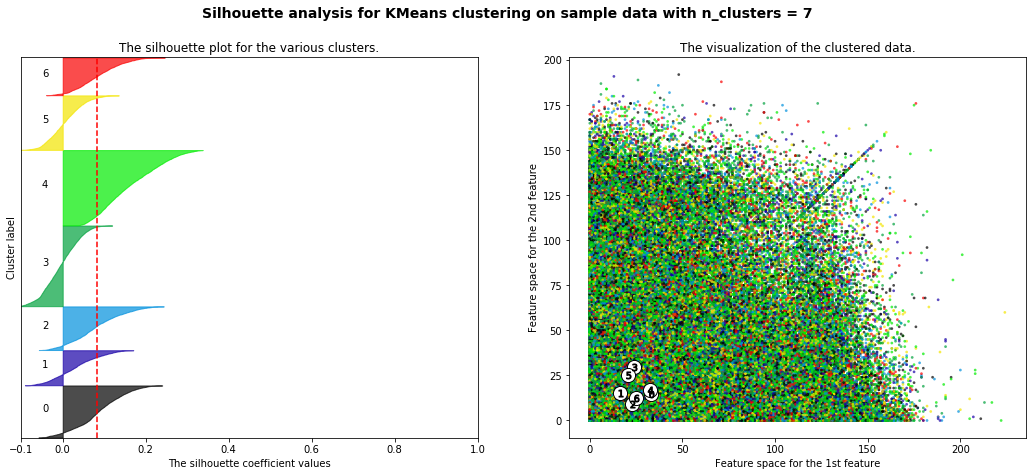

('For n_clusters =', 12, 'The average silhouette_score is :', 0.024819789)


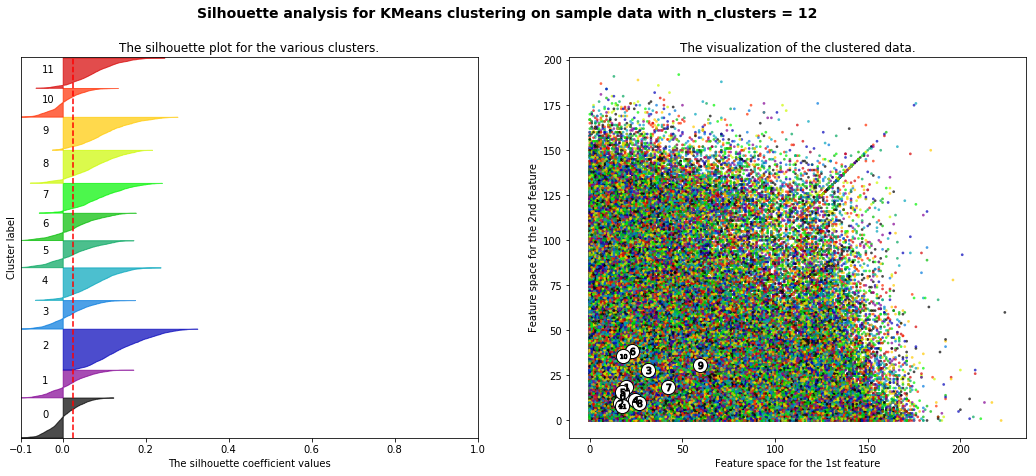

('For n_clusters =', 19, 'The average silhouette_score is :', 0.017393859)


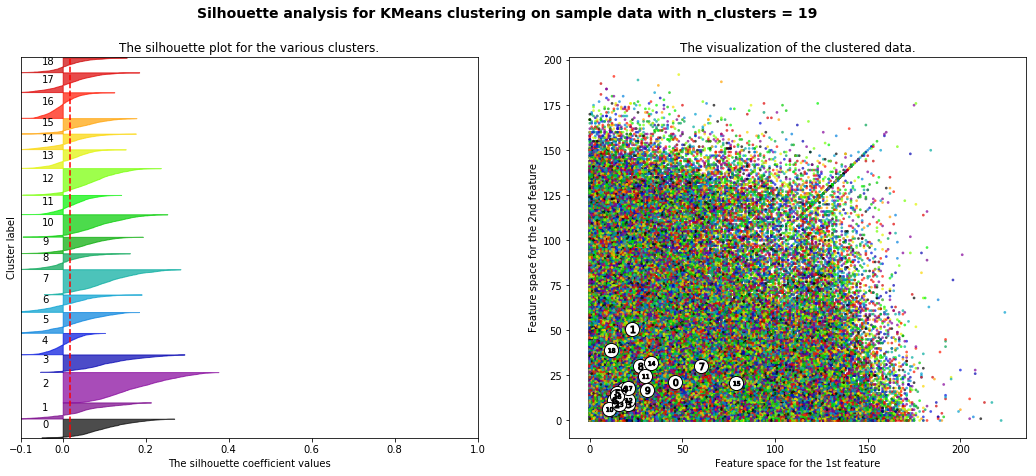

('For n_clusters =', 24, 'The average silhouette_score is :', 0.026628859)


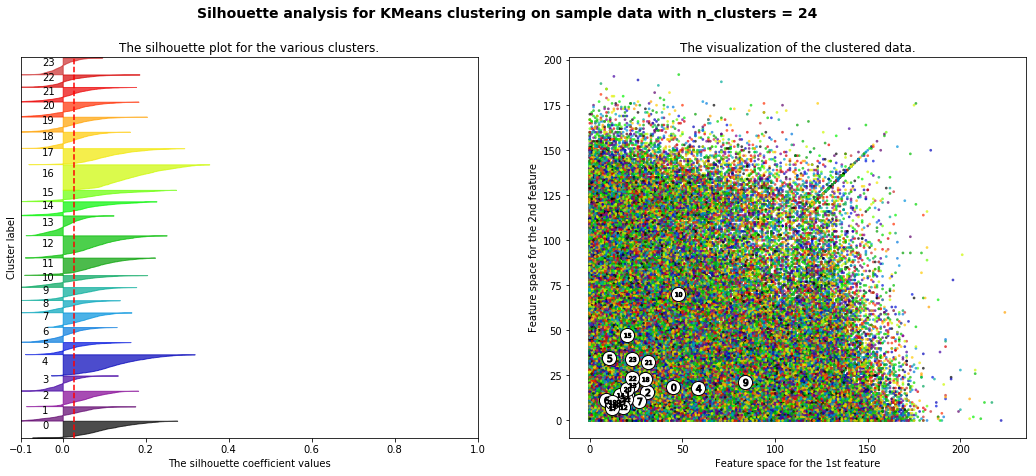

('For n_clusters =', 27, 'The average silhouette_score is :', 0.012478875)


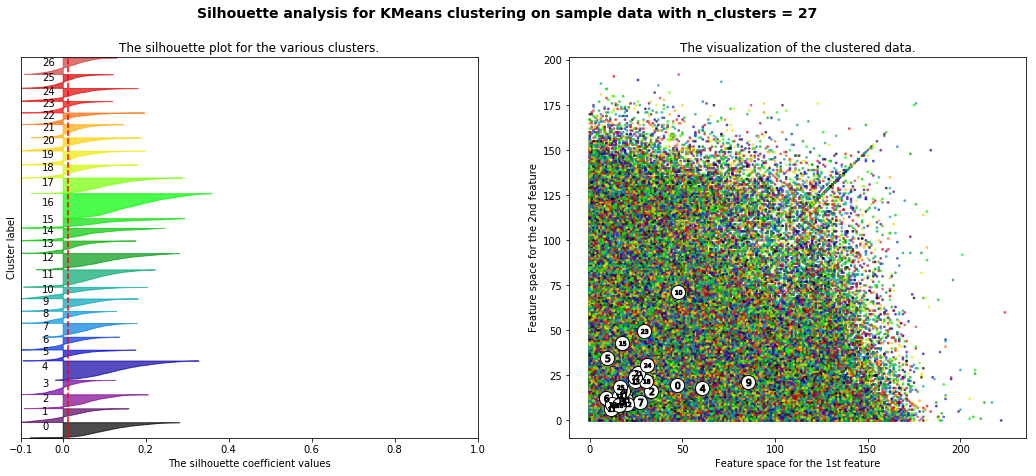

In [723]:
for n_clusters in best_choices:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(sample_descriptors) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=6, n_jobs = -1)
    cluster_labels = clusterer.fit_predict(sample_descriptors)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(sample_descriptors, cluster_labels, sample_size = 100)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(sample_descriptors, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(processed_descriptors[:, 0], processed_descriptors[:, 1],
                marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    fig.savefig("S_score" + str(n_clusters)+".png")

In [110]:
no_of_clusters = 100

In [111]:
kmeans = KMeans(n_clusters = no_of_clusters, random_state=6, n_jobs = -1)
kmeans_ret = kmeans.fit_predict(processed_descriptors)

In [112]:
np.unique(kmeans_ret)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int32)

In [113]:
train_histogram = np.array([np.zeros(no_of_clusters) for i in range(train_count)])

In [114]:
old_count  = 0
for i in range(train_count) :
    l = len(train_descriptors[i])
    for j in range(l) :
        index = kmeans_ret[old_count + j]
        train_histogram[i][index] += 1
    old_count += l

In [115]:
train_histogram.shape

(1178, 100)

In [116]:
train_histogram[0]

array([  3.,   5.,   5.,   7.,   4.,   2.,   3.,   4.,   0.,   4.,   3.,
         8.,   3.,   1.,   2.,   4.,   2.,   4.,   6.,   6.,   6.,   7.,
         5.,   4.,   2.,   4.,   5.,   2.,   1.,   1.,   7.,   5.,   3.,
         2.,   0.,   9.,   6.,   3.,   2.,   4.,   5.,   6.,   5.,   0.,
         0.,   4.,   1.,   4.,   4.,   6.,   0.,   5.,   4.,   3.,   2.,
         2.,   4.,  11.,   3.,   2.,   4.,   3.,   4.,   3.,   4.,   5.,
         3.,   4.,   1.,   1.,   2.,   2.,   1.,   7.,   1.,   1.,   9.,
         6.,   3.,   3.,   2.,   2.,   3.,   7.,   6.,   3.,   1.,   5.,
         3.,   1.,   3.,   5.,   4.,   7.,   3.,   4.,  11.,   4.,   3.,
         2.])

In [117]:
def plot_histogram(no_of_clusters, histogram, name) :
    x_scalar = np.arange(no_of_clusters)
    y_scalar = np.array([abs(np.sum(histogram[:,h], dtype=np.int32)) for h in range(no_of_clusters)])
    plt.bar(x_scalar, y_scalar)
    fig = plt.gcf()
    plt.xlabel("Visual Word Index")
    plt.ylabel("Frequency")
    plt.title("Complete Vocabulary Generated")
    plt.xticks(x_scalar)
    plt.show()
    fig.savefig(name)

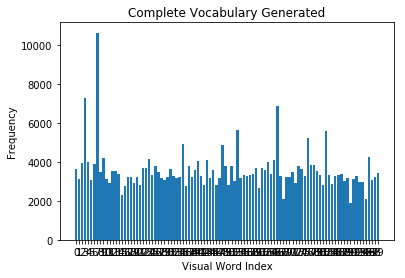

In [118]:
plot_histogram(no_of_clusters, train_histogram,"Vocabulary_before_normalisation.png")

In [119]:
def Scaling_histogram(histogram) :
    for i in range(len(histogram)) :
        sum_value = 0
        for j in range(20) :
            sum_value += histogram[i][j]
        for j in range(20) :
            histogram[i][j] = histogram[i][j] / (sum_value)
    return histogram

In [120]:
def Normalised_histogram(histogram) :
    scale = StandardScaler().fit(histogram)
    return scale.transform(histogram)

In [121]:
len(train_histogram)

1178

In [122]:
train_histogram.shape

(1178, 100)

In [123]:
normalised_train_histogram = Normalised_histogram(train_histogram)

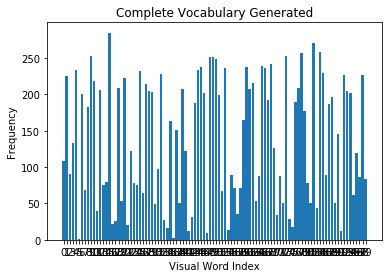

In [124]:
plot_histogram(no_of_clusters, normalised_train_histogram, "Vocabulary_after_normalisation.png")

In [125]:
normalised_train_histogram[0]

array([ -3.08232364e-02,   7.35035438e-01,   5.00401164e-01,
         1.39329165e-01,   1.75458764e-01,  -2.36635704e-01,
        -6.34443033e-02,  -6.37054195e-01,  -8.31060023e-01,
         1.15364143e-01,   1.12829195e-01,   2.31743554e+00,
         2.56071342e-03,  -7.86760958e-01,  -3.20311219e-01,
         8.58408431e-01,  -1.48793886e-01,   5.17514689e-01,
         9.94566895e-01,   1.54159922e+00,   1.19680078e+00,
         2.01879151e+00,   6.81898231e-01,   2.98110118e-01,
        -4.51500754e-01,   3.84886074e-01,   5.70196105e-01,
        -1.94487551e-01,  -4.87483683e-01,  -5.91327352e-01,
         1.60356435e+00,   6.72205092e-01,   8.01309506e-02,
        -2.86543154e-01,  -1.00267618e+00,   6.28841921e-01,
         1.56179809e+00,  -7.55805816e-02,  -3.05850650e-01,
         2.76306780e-01,   5.18675277e-01,   1.19692865e+00,
         1.16715910e+00,  -6.38402193e-01,  -9.09611757e-01,
         2.93651599e-01,  -3.94042967e-01,   5.17191056e-01,
        -2.48142999e-02,

In [126]:
from sklearn.naive_bayes import GaussianNB

In [127]:
clf = GaussianNB()

In [128]:
clf.fit(normalised_train_histogram, train_labels)

GaussianNB(priors=None)

In [129]:
train_labels[69]

0

In [130]:
normalised_train_histogram[6].shape

(100,)

In [131]:
ans = clf.predict(normalised_train_histogram[69].reshape((1,no_of_clusters)))

In [132]:
ans

array([0])

In [133]:
test_histogram = np.array([np.zeros(no_of_clusters) for i in range(test_count)])

In [134]:
len(test_descriptors)

506

In [135]:
kmeans.predict(test_descriptors[0]).shape

(339,)

In [136]:
for i in range(test_count) :
    predictions = kmeans.predict(test_descriptors[i])
    for j in range(len(predictions)) :
        test_histogram[i][predictions[j]] += 1

In [137]:
Normalised_test_histogram = Normalised_histogram(test_histogram)

In [138]:
predictions = clf.score(Normalised_test_histogram, test_labels)

In [139]:
predictions

0.86561264822134387

In [140]:
c1 = 0
c2 = 0
c3 = 0
for i in range(len(train_labels)) :
    if(train_labels[i] == 0) :
        c1 += 1
    elif(train_labels[i] == 1) :
        c2 += 1
    else :
        c3 += 1

In [141]:
print(c1)
print(c2)
print(c3)

563
57
558


In [142]:
c1 = 0
c2 = 0
c3 = 0
for i in range(len(test_labels)) :
    if(test_labels[i] == 0) :
        c1 += 1
    elif(test_labels[i] == 1) :
        c2 += 1
    else :
        c3 += 1

In [143]:
print(c1)
print(c2)
print(c3)

237
29
240


In [144]:
from sklearn.metrics import confusion_matrix
import itertools

In [145]:
predictions = clf.predict(Normalised_test_histogram)

In [146]:
predictions

array([0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0,
       1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2,

In [147]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,name = "Cf.png",
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    fig = plt.gcf()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig.savefig(name)
    plt.show()
    

In [148]:
cnf_matrix = confusion_matrix(test_labels, predictions)

In [149]:
cnf_matrix

array([[198,   6,  33],
       [  8,  17,   4],
       [  8,   9, 223]])

In [150]:
class_names = ['Aeroplanes', 'Faces', 'Motor_bikes']


Confusion matrix, without normalization
[[198   6  33]
 [  8  17   4]
 [  8   9 223]]


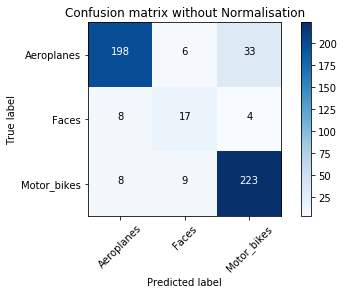

In [151]:
plot_confusion_matrix(cnf_matrix, classes=class_names,normalize= False,
                      name = "NB_Confusion_matrix_without_normalisation.png",
                      title='Confusion matrix without Normalisation')

Normalized confusion matrix
[[ 0.83544304  0.02531646  0.13924051]
 [ 0.27586207  0.5862069   0.13793103]
 [ 0.03333333  0.0375      0.92916667]]


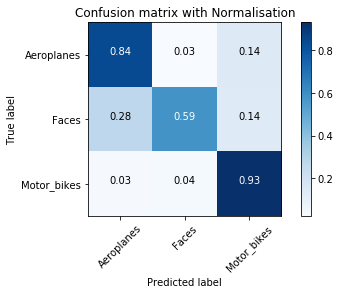

In [152]:
plot_confusion_matrix(cnf_matrix, classes=class_names,normalize= True,
                      name = "NB_Confusion_matrix_with_normalisation.png",
                      title='Confusion matrix with Normalisation')

In [153]:
 from sklearn import tree

In [154]:
clf = tree.DecisionTreeClassifier()

In [155]:
clf = clf.fit(normalised_train_histogram, train_labels)

In [156]:
accuracy = clf.score(Normalised_test_histogram, test_labels)

In [157]:
accuracy

0.84189723320158105

In [158]:
Normalised_test_histogram.shape

(506, 100)

In [159]:
predictions = clf.predict(Normalised_test_histogram)

In [160]:
cnf_matrix = confusion_matrix(test_labels, predictions)

Confusion matrix, without normalization
[[202   5  30]
 [  9  12   8]
 [ 26   2 212]]


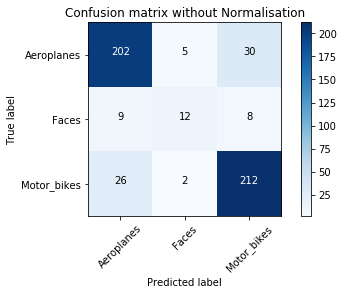

In [161]:
plot_confusion_matrix(cnf_matrix, classes=class_names,normalize= False,
                      name = "Tree_Confusion_matrix_without_normalisation.png",
                      title='Confusion matrix without Normalisation')

Normalized confusion matrix
[[ 0.85232068  0.02109705  0.12658228]
 [ 0.31034483  0.4137931   0.27586207]
 [ 0.10833333  0.00833333  0.88333333]]


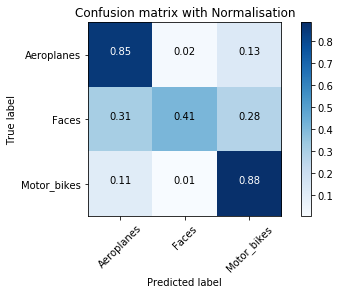

In [162]:
plot_confusion_matrix(cnf_matrix, classes=class_names,normalize= True,
                      name = "Tree_Confusion_matrix_with_normalisation.png",
                      title='Confusion matrix with Normalisation')

In [163]:
from sklearn import svm

In [164]:
clf = svm.SVC()

In [165]:
clf.fit(normalised_train_histogram, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [166]:
clf.score(Normalised_test_histogram, test_labels)

0.94268774703557312

In [167]:
predictions = clf.predict(Normalised_test_histogram)

In [168]:
cnf_matrix = confusion_matrix(test_labels, predictions)

Confusion matrix, without normalization
[[227   3   7]
 [  6  16   7]
 [  5   1 234]]


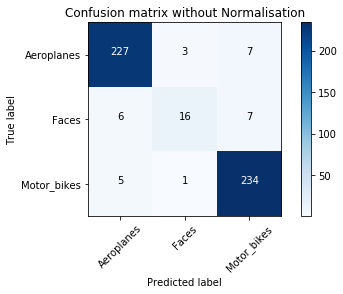

In [169]:
plot_confusion_matrix(cnf_matrix, classes=class_names,normalize= False,
                      name = "SVM_Confusion_matrix_without_normalisation.png",
                      title='Confusion matrix without Normalisation')

Normalized confusion matrix
[[ 0.95780591  0.01265823  0.02953586]
 [ 0.20689655  0.55172414  0.24137931]
 [ 0.02083333  0.00416667  0.975     ]]


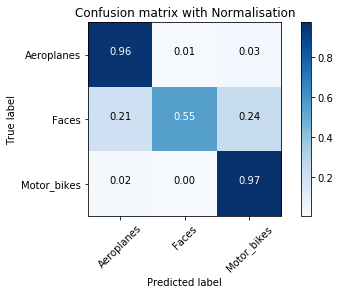

In [170]:
plot_confusion_matrix(cnf_matrix, classes=class_names,normalize= True,
                      name = "SVM_Confusion_matrix_with_normalisation.png",
                      title='Confusion matrix with Normalisation')